In [2]:
#from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers
from keras.models import Model

import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import seaborn as sns

import tensorflow as tf



In [3]:
#Configurações Arbritarias escolhidas para treinamento
batch_size = 64
num_classes = 10
epochs = 10

#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

11490434/11490434 [==============================] - 0s 0us/step


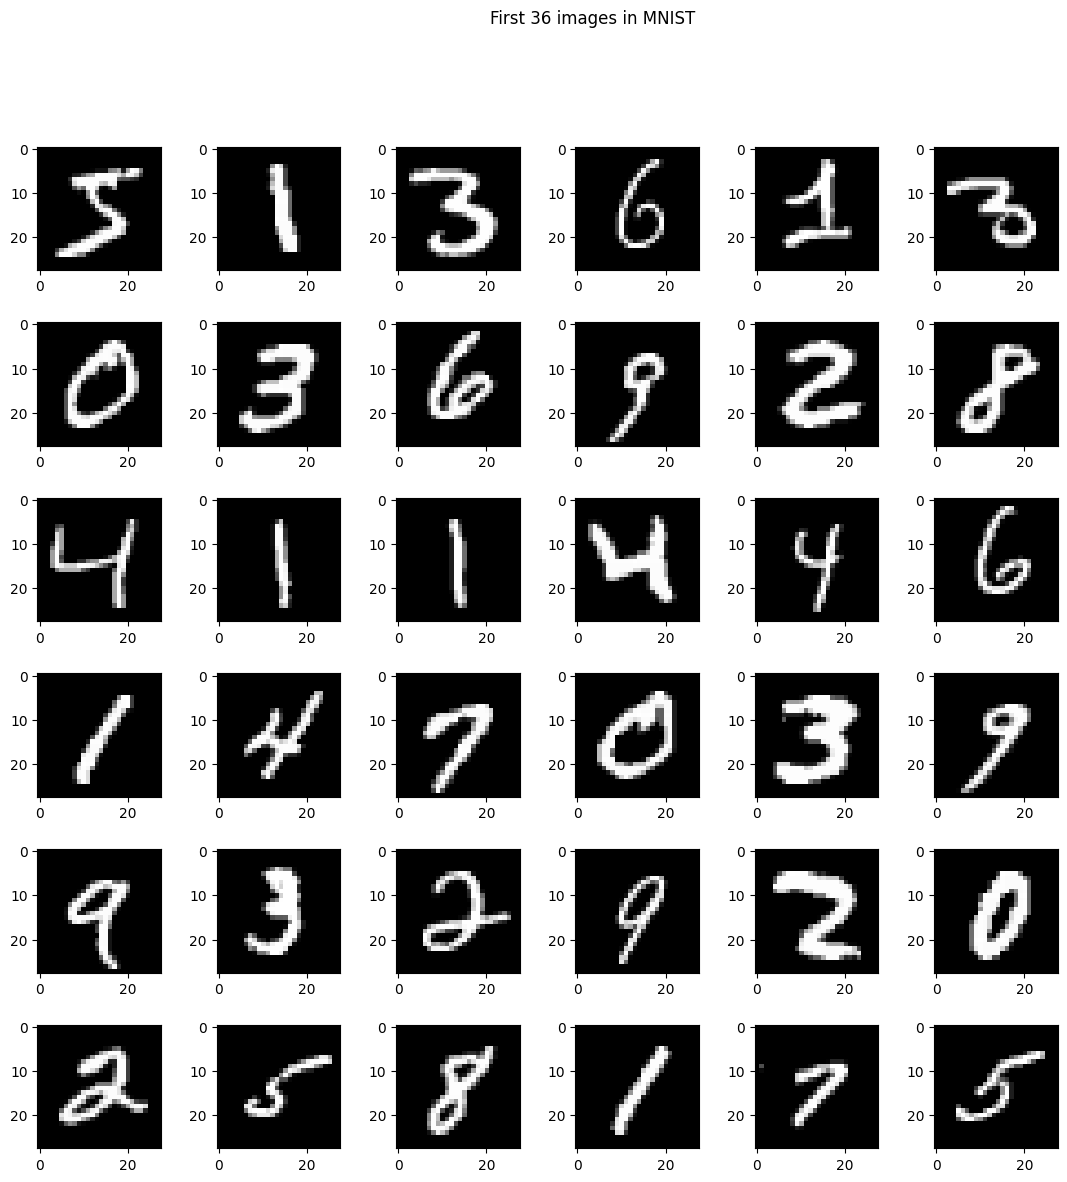

In [4]:
#Carregando imagens e plotando alguns exemplos 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#Inserir estrutura da CNN nessa parte do codigo
model=Sequential()

# 1o. bloco de camadas
model.add(Conv2D(32, (3,3), padding='same', activation= 'relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2o. bloco de camadas
model.add(Conv2D(64, (3,3), padding='same', activation= 'relu'))
model.add(Conv2D(64, (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3o. bloco de camadas
model.add(Conv2D(128, (3,3), padding='same', activation= 'relu'))
model.add(Conv2D(128, (3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [7]:
# Compilar a CNN
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
# Imprimir a architetura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [9]:
# Treinar a CNN
#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1)

fp='/content/checkpoints/bestmodel.hdf5'
mc=tf.keras.callbacks.ModelCheckpoint(
    filepath=fp,
    save_weights=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

results=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[mc])

model.load_weights(fp)

Epoch 1/10
745/750 [============================>.] - ETA: 0s - loss: 0.1540 - accuracy: 0.9507
Epoch 1: val_accuracy improved from -inf to 0.98475, saving model to /content/checkpoints/bestmodel.hdf5
750/750 [==============================] - 19s 8ms/step - loss: 0.1532 - accuracy: 0.9509 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 2/10
748/750 [============================>.] - ETA: 0s - loss: 0.0432 - accuracy: 0.9870
Epoch 2: val_accuracy improved from 0.98475 to 0.98733, saving model to /content/checkpoints/bestmodel.hdf5
750/750 [==============================] - 6s 8ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 3/10
749/750 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9902
Epoch 3: val_accuracy improved from 0.98733 to 0.99025, saving model to /content/checkpoints/bestmodel.hdf5
750/750 [==============================] - 5s 7ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0327 - val_accuracy: 0.99

In [10]:
# Executar a avaliação (teste)
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02507515251636505
Test accuracy: 0.9934999942779541


<ipython-input-11-9c068e78964d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  sty.use('seaborn-whitegrid')


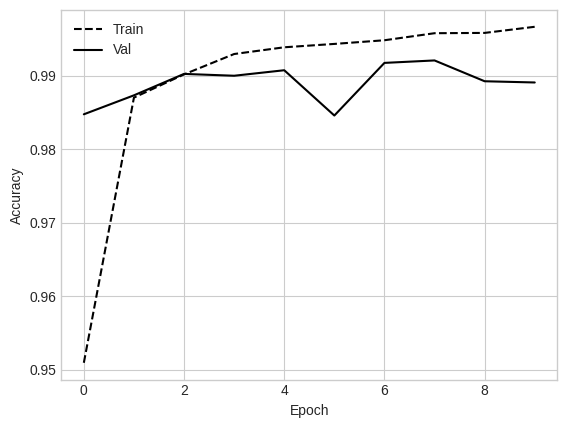

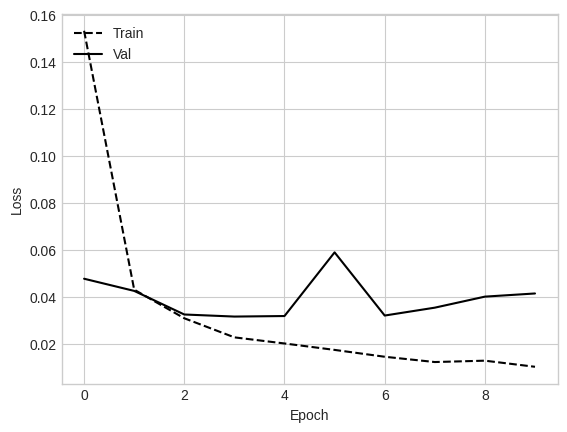

In [11]:
# Plotar o grafico do histórico de evolução do treinamento
sty.use('seaborn-whitegrid')
plt.plot(results.history['accuracy'],'k--')
plt.plot(results.history['val_accuracy'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plota o grafico do histórico de evolução da taxa de perda da rede 
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [12]:
# Plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [13]:
# Predição da CNN
y_predict=np.argmax(model.predict(x_test), axis=1)

# Preparar Matriz de Confusão
cm=confusion_matrix(np.argmax(y_test, axis=1), y_predict)

313/313 [==============================] - 1s 2ms/step


Confusion matrix, without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    0    0    2    0    0]
 [   1    0 1030    0    0    0    0    1    0    0]
 [   0    0    0 1008    0    1    0    1    0    0]
 [   0    1    1    0  968    0    2    1    1    8]
 [   0    0    0    5    0  885    1    0    1    0]
 [   3    3    0    0    1    0  951    0    0    0]
 [   0    2   11    0    0    0    0 1014    0    1]
 [   1    0    0    1    0    0    0    0  971    1]
 [   1    0    2    1    3    1    0    3    0  998]]


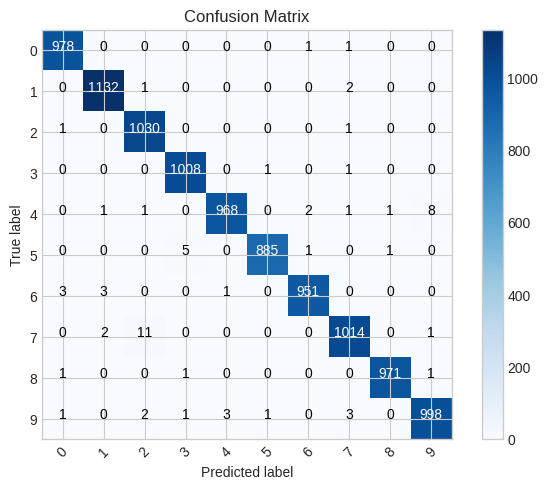

In [14]:
# Chamada da matriz confusão
cm_plot_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion Matrix')


In [15]:
# Salvando o modelo, a arquitetura da CNN
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)

# Salvando os pesos da CNN
model.save_weights("cnn_weights.h5")

In [16]:
# Exemplo de como carregar a usar modelo salvo.

from keras.models import model_from_json

# Carregando o modelo
json_file=open("cnn.json", "r")
cnn_json=json_file.read()
json_file.close()

cnn_model=model_from_json(cnn_json)

# Carregando os pesos
cnn_model.load_weights("cnn_weights.h5")

# Predição usando o modelo carregado
y_predict=np.argmax(cnn_model.predict(x_test), axis=1)

y=np.argmax(y_test, axis=1)

# Predição usando apenas uma imagem
exemplo=x_test[2]
exemplo = exemplo.reshape(1, 28, 28, 1)
saida=cnn_model.predict(exemplo)
classe=np.argmax(saida, axis=1)
print(classe)

1/1 [==============================] - 0s 152ms/step
[1]


1/1 [==============================] - 0s 18ms/step
Classe predita: [6] rótulo: 4 Score:  0.5032384


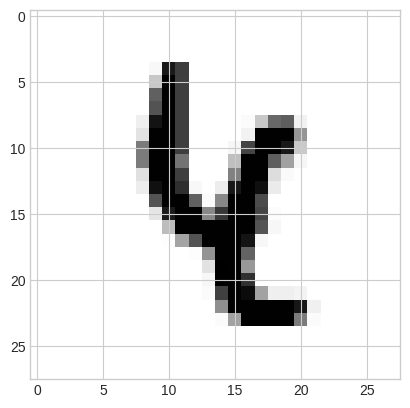

1/1 [==============================] - 0s 17ms/step
Classe predita: [3] rótulo: 8 Score:  0.6629958


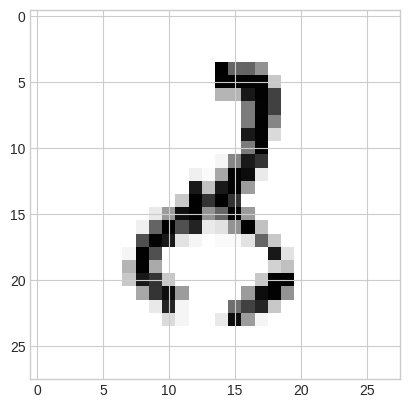

1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: ignored

In [17]:
# Plotando os erros do modelo carregado
from matplotlib import pyplot as plt

rotulos=np.argmax(y_test, axis=1)

for i in range(len(x_test)):
  exemplo=x_test[i]
  exemplo = exemplo.reshape(1, 28, 28, 1)
  saida=cnn_model.predict(exemplo)
  classe=np.argmax(saida, axis=1)
  if (classe == rotulos[i]):
    continue
  print("Classe predita:", classe, "rótulo:", rotulos[i], "Score: ", np.max(saida))
  exemplo = exemplo.reshape(28, 28)
  plt.imshow(exemplo, interpolation='nearest')
  plt.show()

